# 📊 Predictive Analytics Project Notebook
Using customer_purchase_data.csv (Customer behavior dataset)

This notebook includes:

• Data Loading and Initial Exploration  
• Data Cleaning and Preprocessing  
• Exploratory Data Analysis (EDA)  
• Feature Engineering and Selection  
• Feature Scaling  
• Regression Modeling (Linear, Random Forest, XGBoost)  
• Dimensionality Reduction using PCA  
• Customer Segmentation using K-Means Clustering  
• Business Insights and Recommendations



In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report,mean_squared_error)
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer

## 📥 Load Dataset

In [136]:
df = pd.read_csv(r"C:\Users\LENOVO\Documents\3rd year 5th sem\INT234\Projects\customer_purchase_data.csv")
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [113]:
df.shape

(1500, 9)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [115]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


## 🧹 Data Cleaning and Preprocessing


In [116]:
df.isnull().sum()
df.duplicated().sum()
df = df.drop_duplicates()
df.columns = df.columns.str.strip()
print(df.columns)

df.dtypes

Index(['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'PurchaseStatus'],
      dtype='object')


Age                     int64
Gender                  int64
AnnualIncome          float64
NumberOfPurchases       int64
ProductCategory         int64
TimeSpentOnWebsite    float64
LoyaltyProgram          int64
DiscountsAvailed        int64
PurchaseStatus          int64
dtype: object

In [117]:
df.columns = df.columns.str.lower()
target = "numberofpurchases"
X = df.drop(columns=[target])
y = df[target]

## 📊 Exploratory Data Analysis (EDA)


In [118]:
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns
categorical_features = df.select_dtypes(include=["int64"]).columns


## 📊 Univariate Analysis


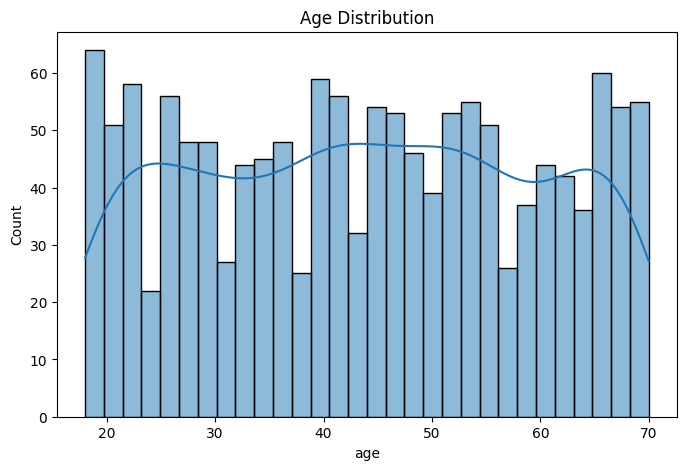

In [119]:
 #Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["age"],bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


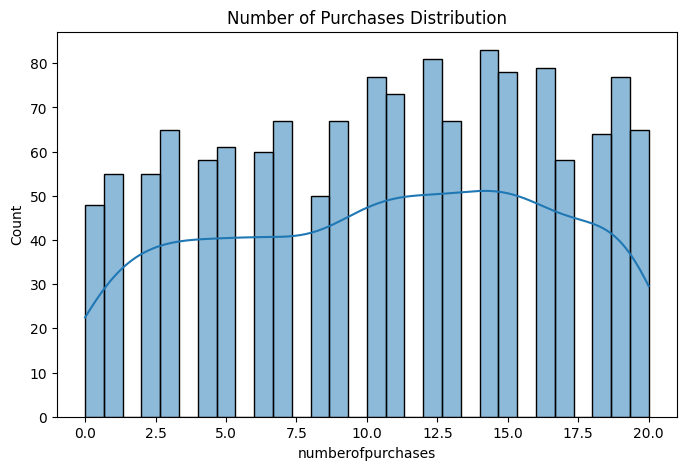

In [120]:
#Number of Purchases Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["numberofpurchases"], bins=30,kde=True)
plt.title("Number of Purchases Distribution")
plt.show() 

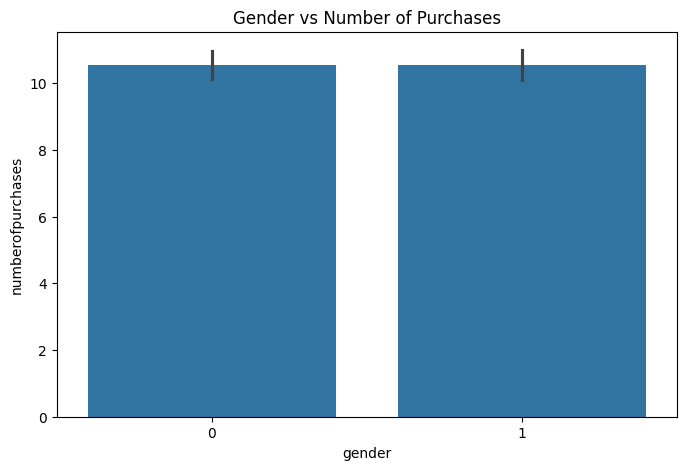

In [121]:
#Gender vs Number of Purchases
plt.figure(figsize=(8,5))
sns.barplot(x="gender", y="numberofpurchases", data=df)
plt.title("Gender vs Number of Purchases")
plt.show() 


 ### 📊 Bivariate Analysis


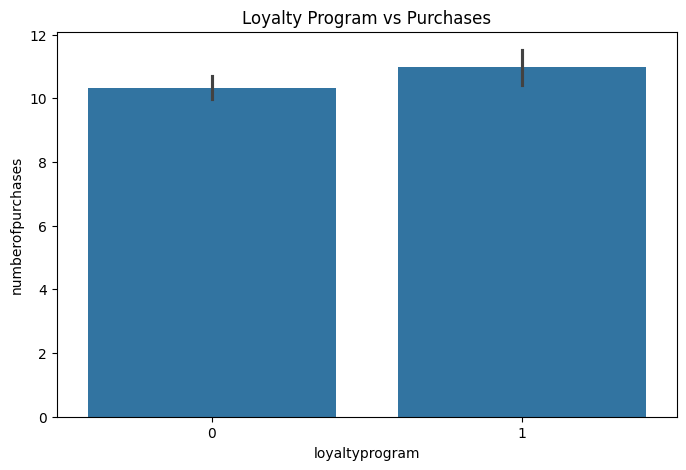

In [122]:
#Loyalty Program vs Purchases
plt.figure(figsize=(8,5))
sns.barplot(x="loyaltyprogram", y="numberofpurchases", data=df)
plt.title("Loyalty Program vs Purchases")
plt.show()  

### 📊 Outlier Analysis


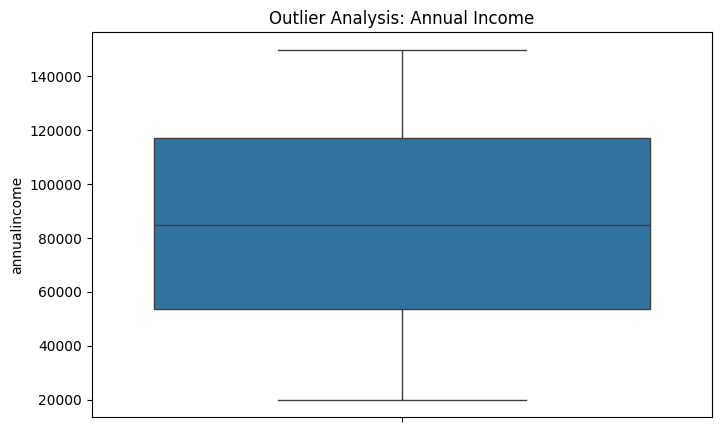

In [123]:
#Annual Income
plt.figure(figsize=(8,5))
sns.boxplot(y=df["annualincome"])
plt.title("Outlier Analysis: Annual Income")
plt.show()


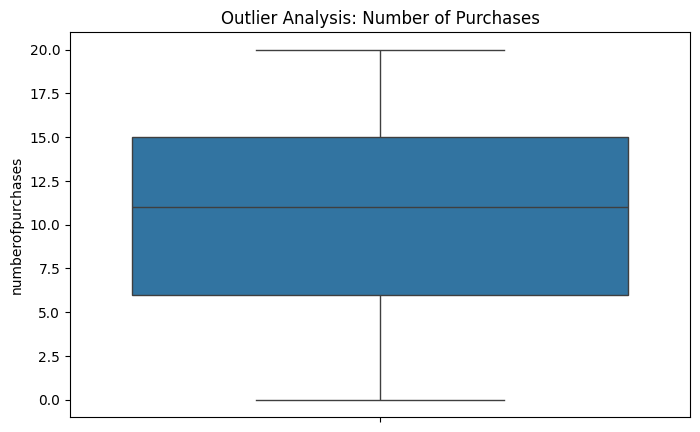

In [124]:
#Number of Purchases Outliers
plt.figure(figsize=(8,5))
sns.boxplot(y=df["numberofpurchases"])
plt.title("Outlier Analysis: Number of Purchases")
plt.show()  

### 📊 Correlation Analysis


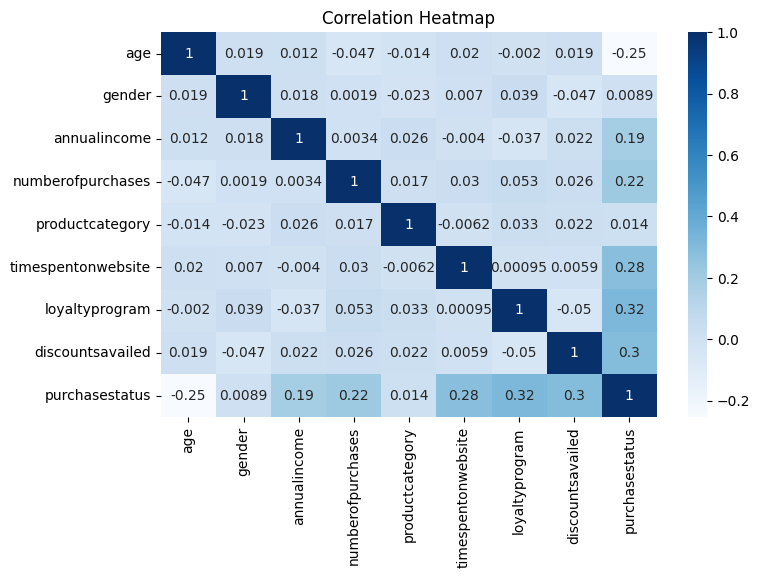

In [125]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


## ⚙️ Feature Engineering and Selection


In [126]:
features = [
    "age",
    "gender",
    "annualincome",
    "timespentonwebsite",
    "discountsavailed",
    "loyaltyprogram",
    "purchasestatus"
]
X = df[features]
y = df["numberofpurchases"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()


,age,gender,annualincome,timespentonwebsite,discountsavailed,loyaltyprogram,purchasestatus
0,-0.254456,0.997122,-0.495070,-0.010544,1.406691,-0.707489,1.068632
1,-1.546283,0.997122,-1.628648,0.441498,1.406691,-0.707489,-0.935775
2,-1.094144,0.997122,1.149081,0.052188,-1.535574,1.413450,1.068632
3,-1.287918,0.997122,1.414947,0.908594,0.818238,-0.707489,1.068632
4,-0.835778,0.997122,0.389098,-0.643694,-1.535574,-0.707489,1.068632


## 🤖 Regression Modeling

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2 = r2_score(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
print("Linear Regression Performance")
print("R2:", r2)
print("RMSE:", rmse) 



Linear Regression Performance
R2: 0.03743783661332856
RMSE: 5.755834675136371


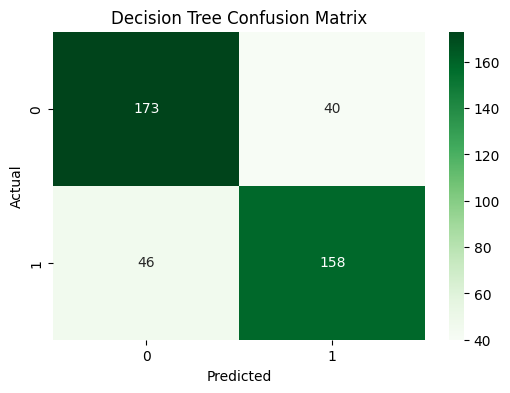

In [138]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_c, pred_dt),
            annot=True, fmt='d', cmap='Greens')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


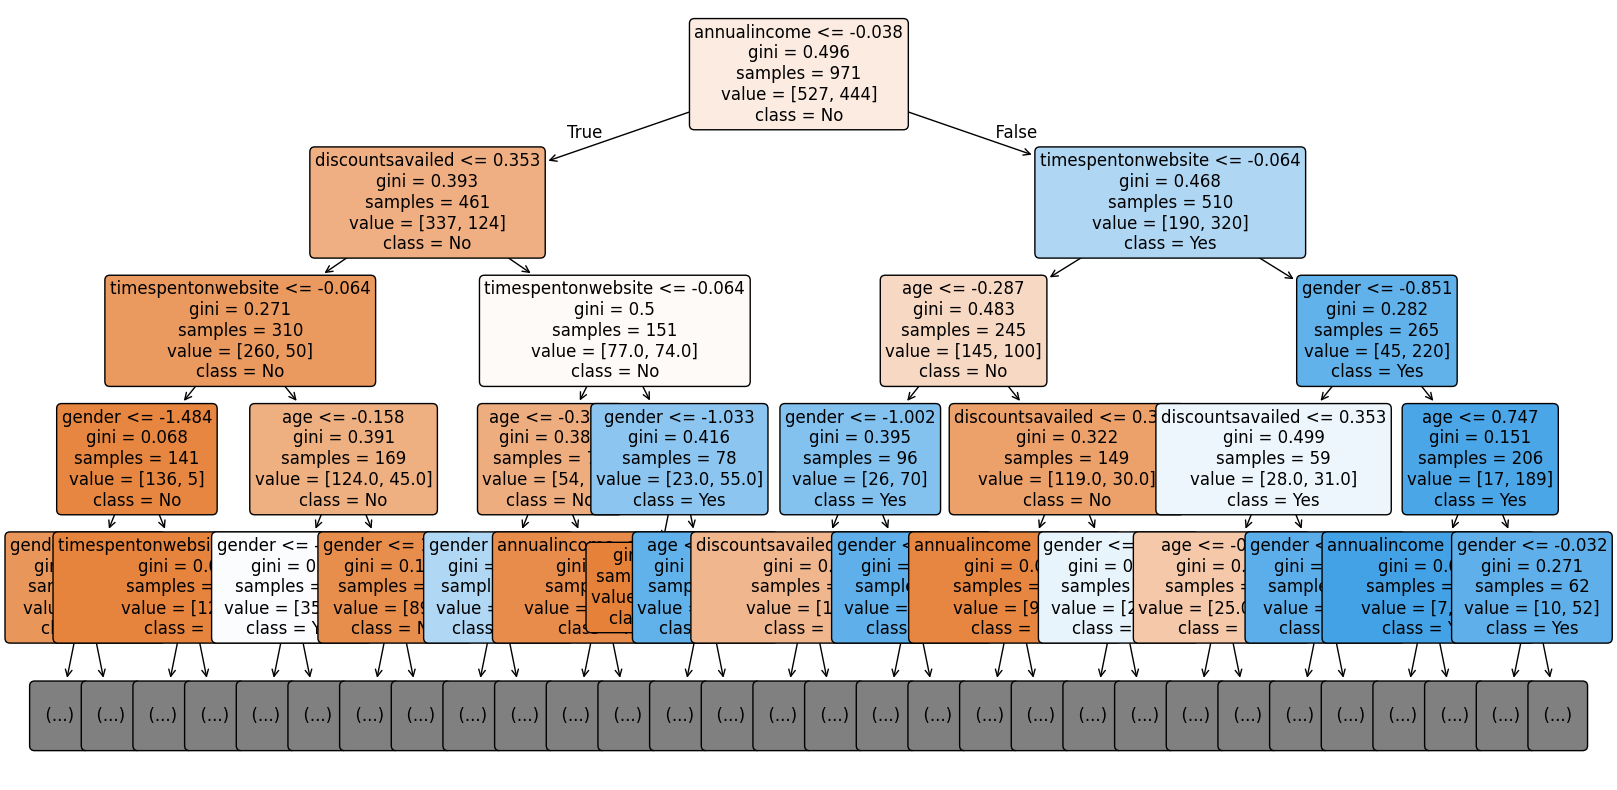

In [153]:
plt.figure(figsize=(20,10))
plot_tree(dt,feature_names=features,class_names=['No','Yes'],filled=True,rounded=True,fontsize=12,max_depth=4)
plt.show()


In [154]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2 = r2_score(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)

print("Random Forest R2:", r2)
print("Random Forest RMSE:", rmse) 

Random Forest R2: -0.05087135786779551
Random Forest RMSE: 6.014073004272514


In [155]:
# Train the model
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)

print("XGBoost R2:", r2)
print("XGBoost RMSE:", rmse)


XGBoost R2: -0.19868719577789307
XGBoost RMSE: 6.423132112073548


In [156]:
model_results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xgb)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    ]
})

model_results


,Model,R2 Score,RMSE
0,Linear Regression,0.037438,5.755835
1,Random Forest,-0.050871,6.014073
2,XGBoost,-0.198687,6.423132


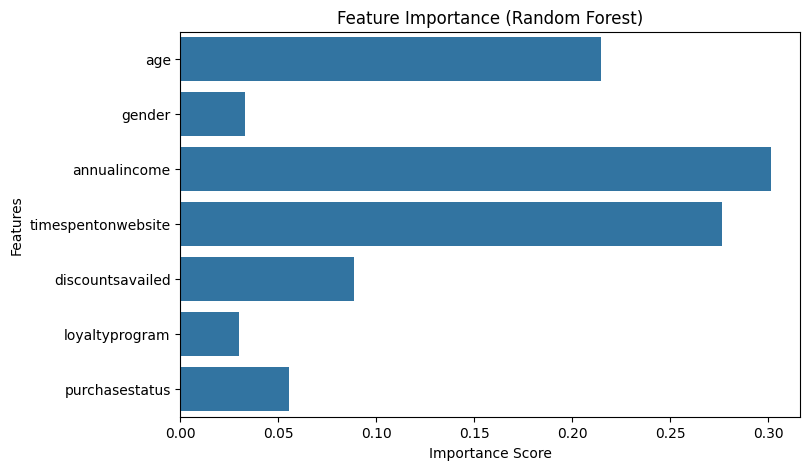

In [157]:
importances = rf.feature_importances_

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


## 🧩 Principal Component Analysis (PCA)


## 🔹 VISUALIZATION 1: PCA Explained Variance

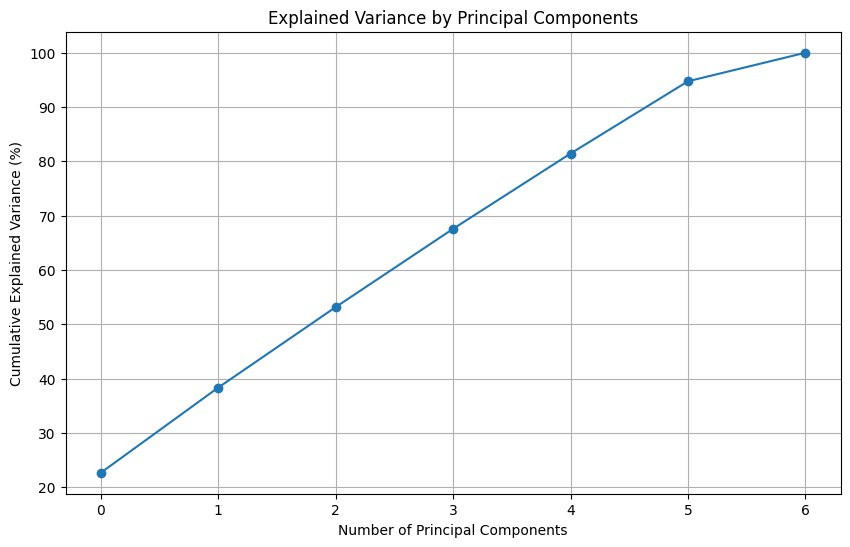

In [158]:
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled_df)

plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_) * 100,marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()


## 🔹 VISUALIZATION 2: PCA Scatter Plot

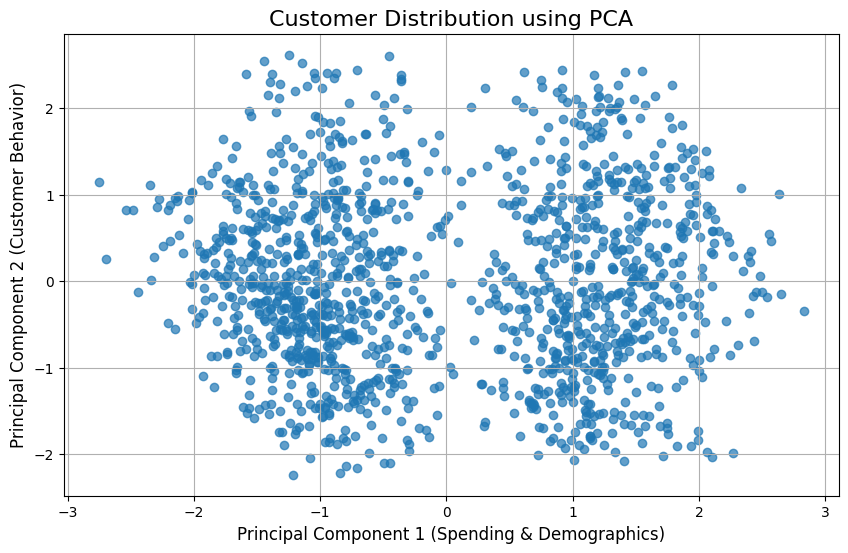

In [159]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled_df)

# Create DataFrame
pca_df = pd.DataFrame(X_pca_2, columns=['PC1', 'PC2'])
plt.figure(figsize=(10,6))
plt.scatter(pca_df['PC1'],pca_df['PC2'],alpha=0.7)
plt.xlabel('Principal Component 1 (Spending & Demographics)', fontsize=12)
plt.ylabel('Principal Component 2 (Customer Behavior)', fontsize=12)
plt.title('Customer Distribution using PCA', fontsize=16)
plt.grid(True)
plt.show()


## 🔹 VISUALIZATION 3: Final PCA for Modeling / Clustering

In [160]:
# Final PCA for clustering/modeling
pca_final = PCA(n_components=5)
X_pca_final = pca_final.fit_transform(X_scaled_df)
X_pca_df = pd.DataFrame(X_pca_final,columns=[f'PC{i+1}' for i in range(X_pca_final.shape[1])])
X_pca_df.head()


,PC1,PC2,PC3,PC4,PC5
0,0.965165,-0.624616,0.182682,-0.025416,-0.187420
1,-0.202307,-0.201523,-1.011407,-0.524329,0.581567
2,1.338039,1.993005,0.170625,1.533678,0.569563
3,1.790834,-0.703468,0.631366,1.189628,1.211892
4,0.117795,0.875562,-0.084217,1.527441,1.045283


## 🤖 K-Means Clustering(Customer Segmentation)


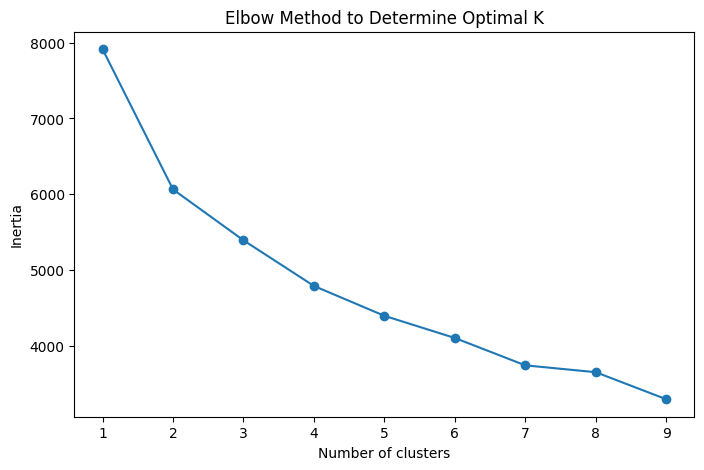

In [161]:
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca_df)  # PCA-transformed features
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method to Determine Optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()


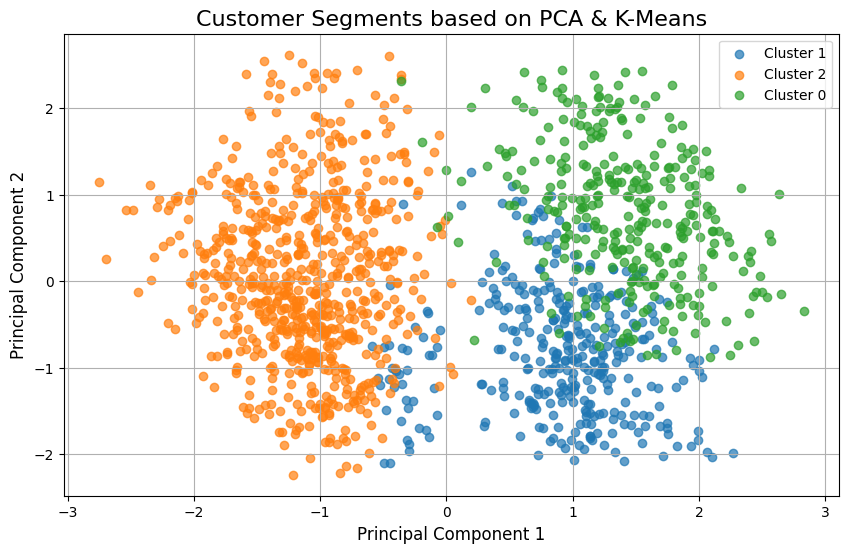

In [162]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca_df)
# Add cluster labels
pca_clustered_df = pca_df.copy()
pca_clustered_df['Cluster'] = clusters
plt.figure(figsize=(10,6))

for cluster in pca_clustered_df['Cluster'].unique():
    plt.scatter(pca_clustered_df[pca_clustered_df['Cluster'] == cluster]['PC1'],pca_clustered_df[pca_clustered_df['Cluster'] == cluster]['PC2'],
        label=f'Cluster {cluster}',alpha=0.7)

plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.title('Customer Segments based on PCA & K-Means', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()
